In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [23]:
# Loading the dataset
df = pd.read_csv(r"/workspaces/Predicting-loan-default/Loan_default.csv")

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [24]:
# summary stats
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [25]:
# Check for missing values
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [26]:
# Check data types
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [27]:
# DATASET OVERVIEW

# Dataset Overview: The dataset contains 255,347 entries and 18 columns. The target variable is 'Default', which is binary (0 or 1).
# Missing Values: There are no missing values in the dataset, which simplifies the preprocessing step.
# Data Types: Most of the features are numeric (int64 or float64), 
# but there are several categorical features ('Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner') that need to be encoded before they can be used in a machine learning model.

#### Feature Selection

In [28]:
# Preliminary Feature Selection

# Here, we remove features that do not provide predictive value to the model

# the LoanID column seems to be a unique identifier for each loan and is unlikely to have predictive power, so we can consider dropping it.
df = df.drop('LoanID', axis=1)

In [29]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


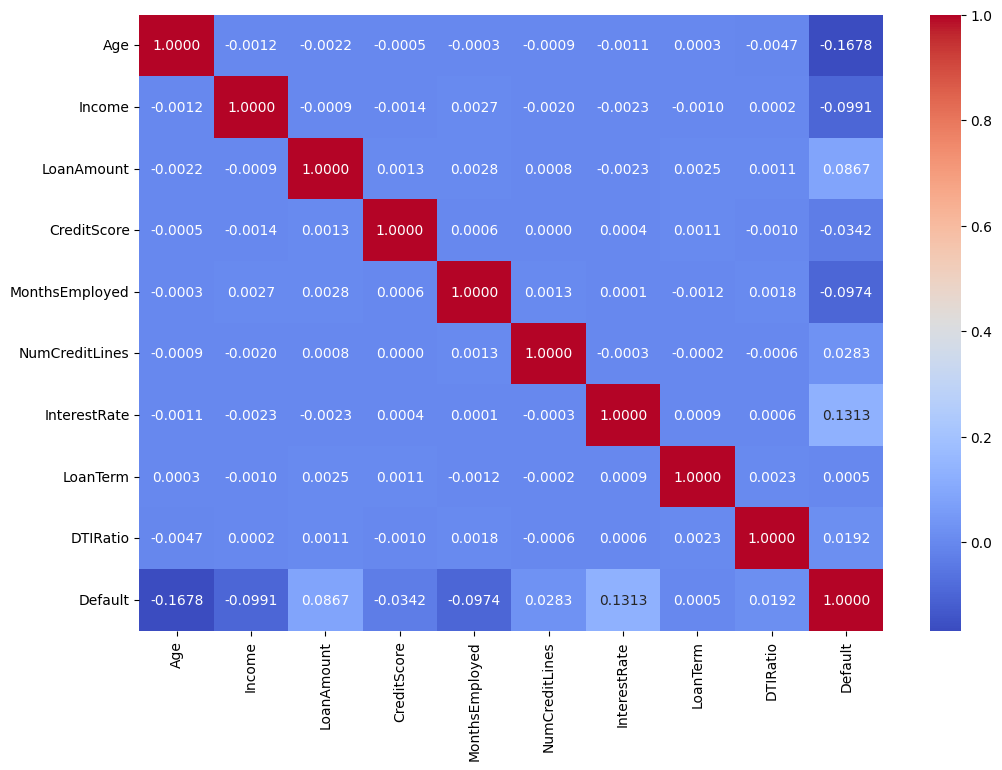

In [30]:
# RUNNING CORRELATION ANALYSIS ON NUMERICAL FEATURES

# Features that are highly correlated with each other can be considered redundant. 
# For example, if two features provide very similar information, you might choose to keep only one of them. 
# At this stage, we can look at the correlation matrix to identify any potential redundant features.

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot the correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.4f')
plt.show()

In [31]:
# Age and Default: There is a moderate negative correlation (-0.167783) between Age and Default. This suggests that older borrowers are less likely to default on their loans.
# Income and Default: There is a negative correlation (-0.099119) between Income and Default, indicating that borrowers with higher incomes are less likely to default.
# LoanAmount and Default: There is a positive correlation (0.086659) between LoanAmount and Default, suggesting that higher loan amounts are associated with a higher likelihood of default.
# CreditScore and Default: There is a negative correlation (-0.034166) between CreditScore and Default, which is expected as higher credit scores are typically associated with lower default rates. (based on domain knowledge)
# MonthsEmployed and Default: There is a negative correlation (-0.097374) between MonthsEmployed and Default, indicating that borrowers with longer employment history are less likely to default.
# InterestRate and Default: There is a positive correlation (0.131273) between InterestRate and Default, suggesting that higher interest rates are associated with a higher likelihood of default.


# Based on these observations, features like Age, Income, LoanAmount, CreditScore, MonthsEmployed, and 
# InterestRate seem to have some relationship with the target variable Default and are likely to be important for predicting loan defaults.

# You would notice that I included credit score as an important feature despite a relativeloy low correlation.
# The reason is that based on domain knowledge and common practice in the field of credit risk modeling, credit scores are generally considered to be a strong predictor of loan default.

In [32]:
# Correlation analysis measures the linear relationship between two variables.
# It only captures linear relationships and might not detect non-linear relationships. 
# it also doesn't take into account the interactions between features or the combined effect of multiple features on the target variable.
# To get a more comprehensive view of how each feature contributes to the model's performance, including non-linear relationships and interactions between features,
# I will use feature importance from a Random Forest Model


# Separating features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Defining the preprocessor with one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder='passthrough')

# Applying the preprocessing
X_transformed = preprocessor.fit_transform(X)

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Training a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# getting the feature importance
importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                              Feature  Importance
16                  remainder__Income    0.125774
21            remainder__InterestRate    0.119423
17              remainder__LoanAmount    0.112959
15                     remainder__Age    0.103048
18             remainder__CreditScore    0.098931
19          remainder__MonthsEmployed    0.097276
23                remainder__DTIRatio    0.087991
22                remainder__LoanTerm    0.040355
20          remainder__NumCreditLines    0.032585
8                cat__HasMortgage_Yes    0.015027
7           cat__MaritalStatus_Single    0.013979
0          cat__Education_High School    0.012449
9              cat__HasDependents_Yes    0.012367
10          cat__LoanPurpose_Business    0.012130
6          cat__MaritalStatus_Married    0.012095
1             cat__Education_Master's    0.012094
3       cat__EmploymentType_Part-time    0.012056
2                  cat__Education_PhD    0.012043
13             cat__LoanPurpose_Other    0.012007


In [33]:
# Based on the feature importance scores from the Random Forest model, we can see that the most important features for predicting loan defaults are:

# 1. Income: This is the most important feature, which aligns with the intuition that a borrower's income is a crucial factor in their ability to repay a loan.
# 2. Interest Rate: The interest rate of the loan is also highly important, suggesting that higher interest rates might be associated with a higher likelihood of default.
# 3. Loan Amount: The amount of the loan is another key factor, which makes sense as larger loans might be harder to repay.
# 4. Age: The borrower's age is also important, potentially reflecting different financial stability levels at different life stages.
# 5. Credit Score: As expected, the borrower's credit score is a significant predictor, with higher scores indicating lower risk of default.
# 6. Months Employed: The length of employment is also important, likely reflecting the borrower's job stability and income security.
# 7. DTIRatio (Debt-to-Income Ratio): This is another critical factor, indicating the borrower's ability to manage loan repayments relative to their income.

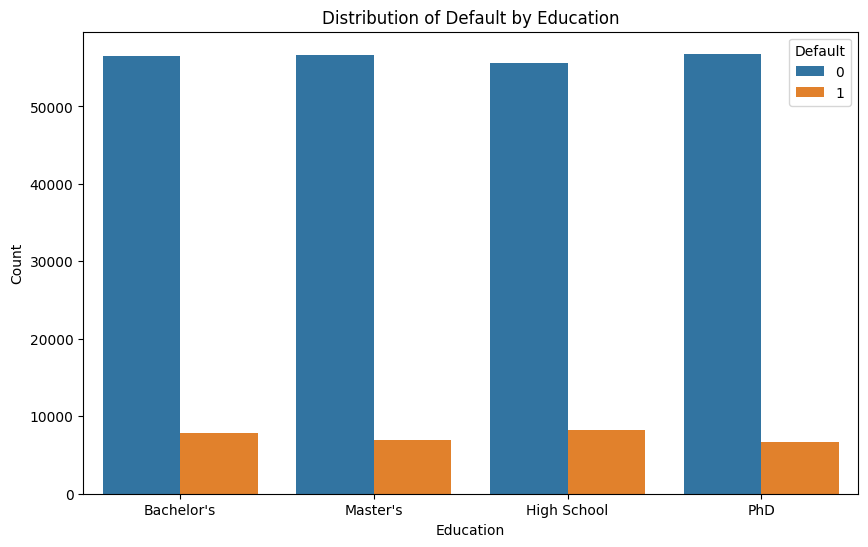

Chi-squared test for Education and Default:
Chi-squared statistic: 214.01898255592704
p-value: 3.9404864175508716e-46



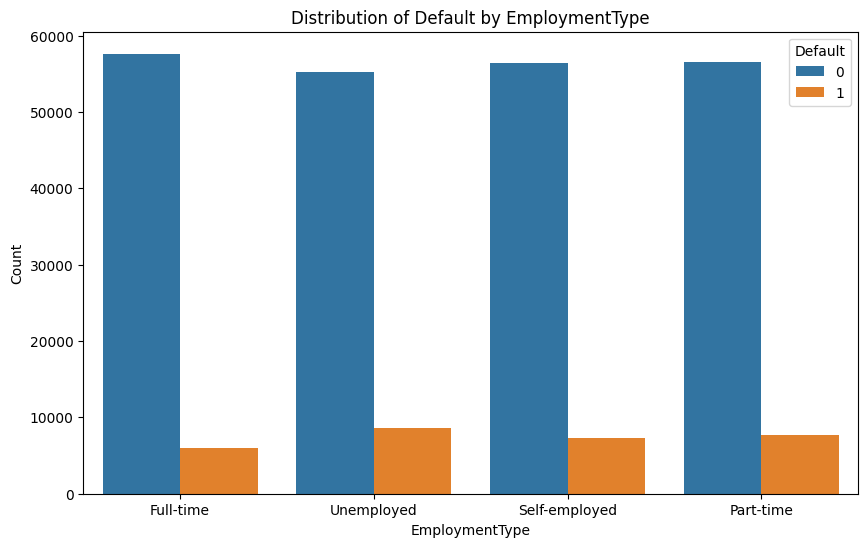

Chi-squared test for EmploymentType and Default:
Chi-squared statistic: 529.7449284156027
p-value: 1.7066378020433154e-114



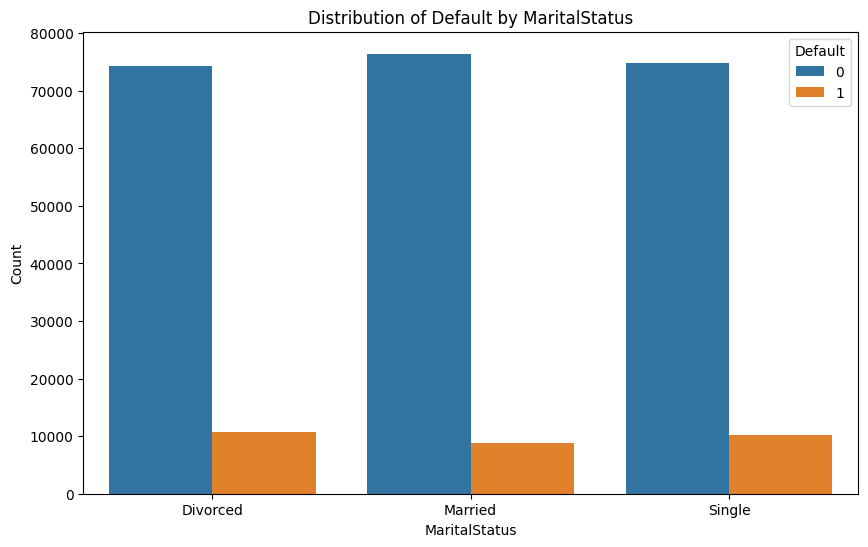

Chi-squared test for MaritalStatus and Default:
Chi-squared statistic: 200.3611356065489
p-value: 3.105504830442356e-44



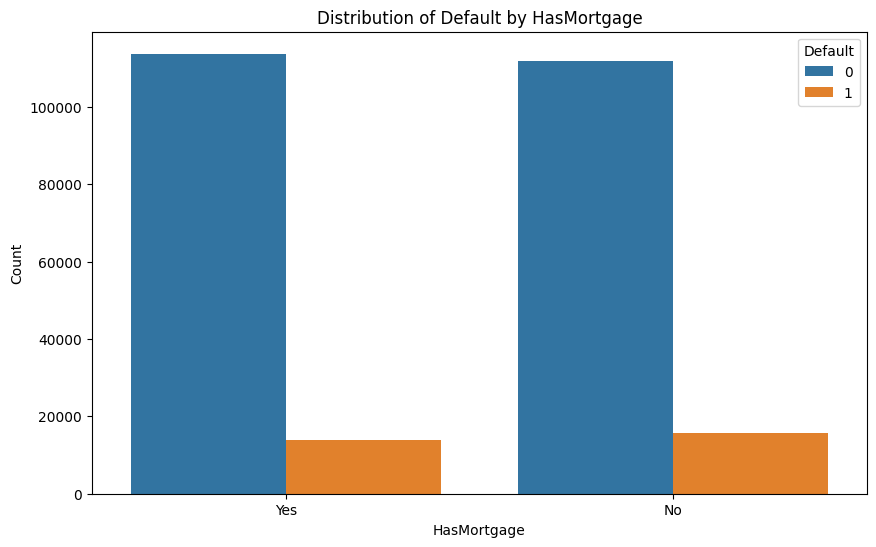

Chi-squared test for HasMortgage and Default:
Chi-squared statistic: 133.25200560751577
p-value: 7.96338322455275e-31



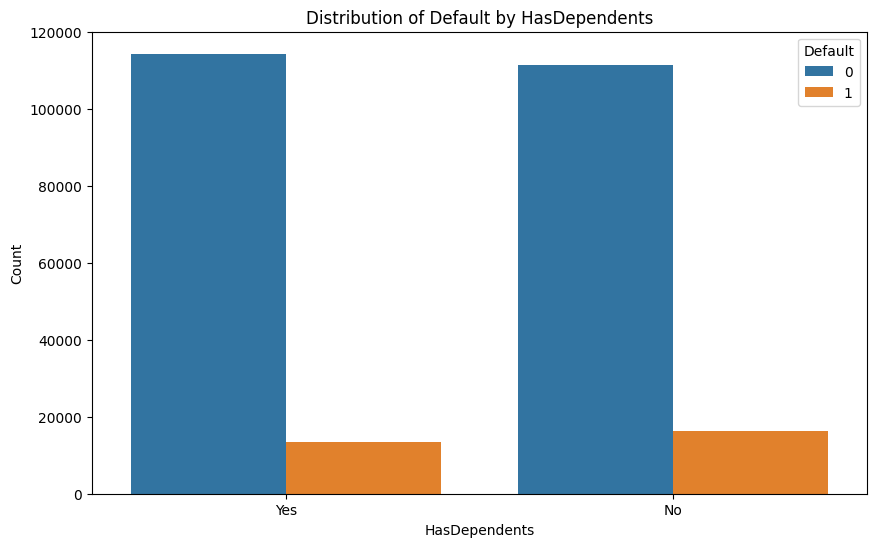

Chi-squared test for HasDependents and Default:
Chi-squared statistic: 306.8506093007918
p-value: 1.0600086119645882e-68



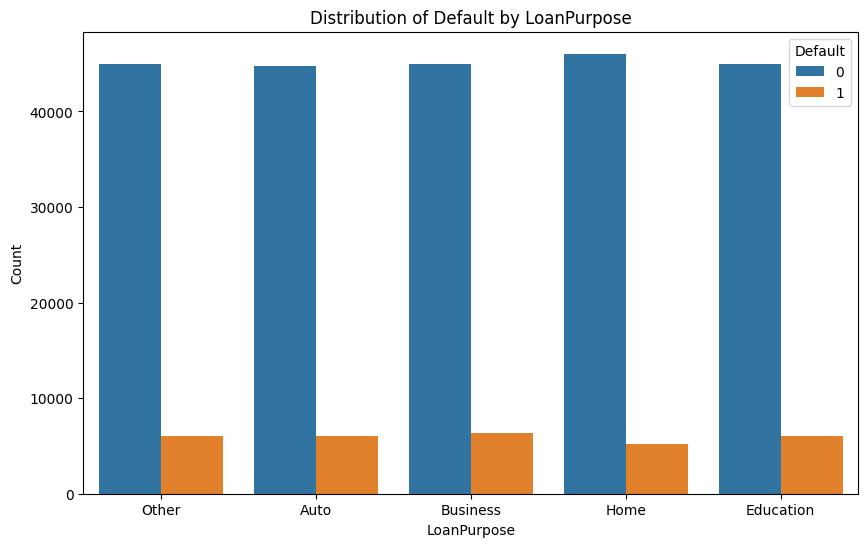

Chi-squared test for LoanPurpose and Default:
Chi-squared statistic: 127.93422475687699
p-value: 1.0767865809403042e-26



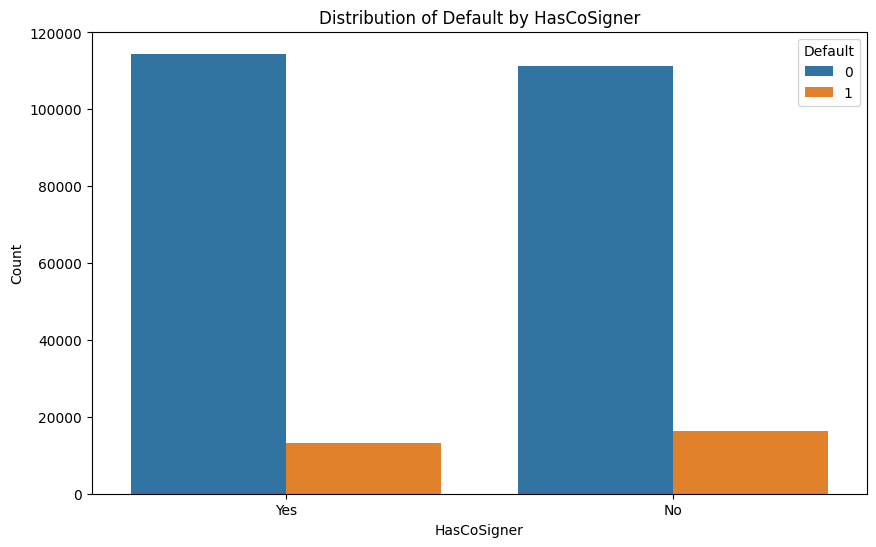

Chi-squared test for HasCoSigner and Default:
Chi-squared statistic: 390.3050463714834
p-value: 7.103434211754059e-87



In [34]:
# I would still want to look at the Categorical separately to select important features
# This separate analysis can provide additional insights into the relationship between categorical features and the target variable, 
# which might not be fully captured by the feature importance scores alone.

# Let us examine the relationship between each categorical feature and the target variable Default. 
# This can be done by looking at the distribution of the target variable within each category and using statistical tests to assess the significance of the association.

# For each categorical feature, we'll perform a statistical test called the chi-squared test. 
# This test checks whether there's a significant relationship between the categorical feature and the loan default status. The result of the test is a p-value.

# If the p-value is small (usually less than 0.05), it suggests that there's a significant relationship between the feature and loan default status. 
# This means that the feature might be important for predicting loan defaults.

# If the p-value is large (usually greater than 0.05), it suggests that there's no significant relationship, and the feature might not be as important.

# Define a function to plot the distribution of the target variable by category
def plot_target_distribution_by_category(df, feature, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue=target, data=df)
    plt.title(f'Distribution of {target} by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Define a function to perform a chi-squared test for independence
def chi_squared_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {feature} and {target}:')
    print(f'Chi-squared statistic: {chi2}')
    print(f'p-value: {p}\n')

# List of categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Analyze each categorical feature
for feature in categorical_features:
    plot_target_distribution_by_category(df, feature, 'Default')
    chi_squared_test(df, feature, 'Default')

In [35]:
# The results of the chi-squared tests show that all the categorical features have very small p-values, 
# which are much less than the typical significance level of 0.05. 

# This means that there is a statistically significant association between each of these categorical features and the target variable Default.

In [36]:
"""
For numerical features, we selected the below:
Income
InterestRate
LoanAmount
Age
CreditScore
MonthsEmployed
DTIRatio

For categoricals, we selected
Education
EmploymentType
MaritalStatus
HasMortgage
HasDependents
LoanPurpose
HasCoSigner

"""

'\nFor numerical features, we selected the below:\nIncome\nInterestRate\nLoanAmount\nAge\nCreditScore\nMonthsEmployed\nDTIRatio\n\nFor categoricals, we selected\nEducation\nEmploymentType\nMaritalStatus\nHasMortgage\nHasDependents\nLoanPurpose\nHasCoSigner\n\n'

#### Data Preprocessing

In [37]:
# It's a good practice to check for class imbalance in the full dataset before splitting it into training and test sets. 
# This gives you an overview of the distribution of the target variable and helps you decide if addressing class imbalance is necessary.

# In the event of an imbalance, we use oversampling or undersampling techniques to balance the data.
# When addressing the class imbalance (especially with oversampling techniques like SMOTE), 
# it's important to apply them only to the training set and not to the test set. 
# This is because the test set should reflect the real-world distribution of classes and should not be artificially manipulated

In [38]:
# Check for class imbalance
print("Class distribution in the target variable:")
print(df['Default'].value_counts(normalize=True))

Class distribution in the target variable:
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


In [39]:
# Defining the selected features
selected_numerical_features = ['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore', 'MonthsEmployed', 'DTIRatio']
selected_categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
selected_features = selected_numerical_features + selected_categorical_features

# Dropping unselected features
df_selected = df[selected_features + ['Default']]

# Separating features and target
X = df_selected.drop('Default', axis=1)
y = df_selected['Default']


In [40]:
# Preprocess the data
# We are applying standard scaler to the numericals to ensure that all numerical features contribute equally to the mode and one-hot encoding to the categoricals

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_numerical_features),
        ('cat', OneHotEncoder(drop='first'), selected_categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)


In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [42]:
# We checked for class imbalance earlier and we saw that the data was hugely imbalanced.
# We will address that by oversampling the train data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Model Training with Random Forest